In [36]:
import numpy as np
from matplotlib.pyplot import plot
import pandas
from sklearn.model_selection import train_test_split

            exam1       exam2    decision
count  100.000000  100.000000  100.000000
mean    65.644274   66.221998    0.600000
std     19.458222   18.582783    0.492366
min     30.058822   30.603263    0.000000
25%     50.919511   48.179205    0.000000
50%     67.032988   67.682381    1.000000
75%     80.212529   79.360605    1.000000
max     99.827858   98.869436    1.000000


exam1          AxesSubplot(0.125,0.125;0.227941x0.755)
exam2       AxesSubplot(0.398529,0.125;0.227941x0.755)
decision    AxesSubplot(0.672059,0.125;0.227941x0.755)
dtype: object

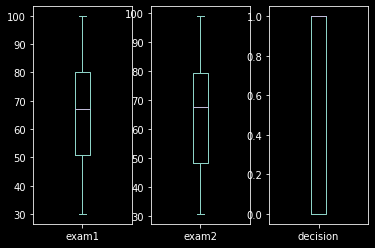

In [37]:
# Load data from file

data = pandas.read_csv('acceptance_data.txt', names = ['exam1','exam2','decision'])

print(data.describe())
data.plot(kind='box', subplots=True)

In [38]:
X = data.drop(columns=['decision']).round(2) # Features (exam scores)
y = data['decision'] # Labels (acceptance decision)

<class 'pandas.core.frame.DataFrame'>


exam1       AxesSubplot(0.125,0.125;0.352273x0.755)
exam2    AxesSubplot(0.547727,0.125;0.352273x0.755)
dtype: object

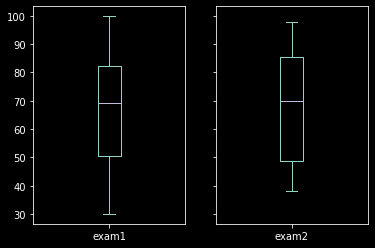

In [39]:
# Perform data preprocessing and split data to 2 sets 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=100)

print(type(X_train))
X_train.plot(kind='box', subplots=True, sharey=True)

exam1       AxesSubplot(0.125,0.125;0.352273x0.755)
exam2    AxesSubplot(0.547727,0.125;0.352273x0.755)
dtype: object

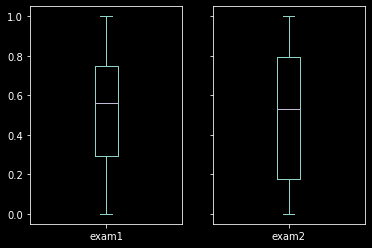

In [40]:
# Feature scaling (Min-Max Scaling)
xmin = X_train.min()
xmax = X_train.max()
X_train = (X_train - xmin) / (xmax - xmin)
X_test = (X_test - xmin) / (xmax - xmin)

# Box plot after feature scaling
X_train.plot(kind='box', subplots=True, sharey=True)

In [41]:
# Convert DataFrame to NumPy arrays
X_train = X_train.to_numpy()
X_test = X_test.to_numpy()
y_train = y_train.to_numpy() 
y_test = y_test.to_numpy()

In [42]:

# Sigmoid function for logistic regression
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Cost function for logistic regression
def cost_function(theta, X, y):
    m = len(y)
    h = sigmoid(X @ theta)
    cost = -(1/m) * np.sum(y * np.log(h) + (1 - y) * np.log(1 - h))
    return cost

# Gradient descent for parameter optimization
def gradient_descent(theta, X, y, alpha, iterations):
    m = len(y)
    for _ in range(iterations):
        h = sigmoid(X @ theta)
        gradient = (1/m) * X.T @ (h - y)
        theta -= alpha * gradient
    return theta


In [43]:
# Initialize parameters
theta_initial = np.zeros(X_train.shape[1])

# Set hyperparameters
learning_rate = 0.01
num_iterations = 1000

In [44]:
# Train the logistic regression model
theta_optimized = gradient_descent(theta_initial, X_train, y_train, learning_rate, num_iterations)

In [45]:
# Assess the fitted model on the test data

# Prediction function
def predict(theta, X):
    return (sigmoid(X @ theta) >= 0.5).astype(int)

# Make predictions on the test set
y_pred = predict(theta_optimized, X_test)

In [46]:
# Calculate accuracy
accuracy_v1 = np.mean(y_pred == y_test)
print(f"Accuracy on test set: {accuracy_v1*100}%")

Accuracy on test set: 56.00000000000001%


In [48]:
# Step 6: Generate predictions for new data
# (Assuming you have new data in a variable 'new_data')
# Preprocess new_data similar to the training data
# Add bias term
# Use the trained theta_optimized to make predictions